In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline


In [2]:
FILENAME = 'fer2013/fer2013.csv'
data = pd.read_csv(FILENAME)

In [3]:
data.groupby('Usage').size()

Usage
PrivateTest     3589
PublicTest      3589
Training       28709
dtype: int64

In [4]:
EMOTIONS_DICT = {0: 'Angry', 1: 'Disgust', 2: 'Fear',
                 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
data.replace(to_replace=EMOTIONS_DICT, inplace=True)

In [5]:
emotions = data.groupby(['emotion']).size()
emotions


emotion
Angry       4953
Disgust      547
Fear        5121
Happy       8989
Neutral     6198
Sad         6077
Surprise    4002
dtype: int64

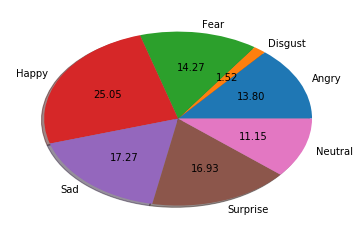

In [6]:
plt.pie(emotions, labels=EMOTIONS_DICT.values(), autopct='%.2f', shadow=True)
plt.savefig('data.png')
plt.show()


In [7]:
data['pixels'] = data['pixels'].apply(
    lambda img: np.fromstring(img, sep=' '))
data['pixels'] = np.vstack(data['pixels'].values)
data['pixels'] = data['pixels'].reshape(-1, 48, 48, 1)

/home/mandark/.conda/envs/tf1.7/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


ValueError: cannot reshape array of size 35887 into shape (48,48,1)

TypeError: Invalid dimensions for image data

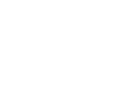

In [54]:
emotions_index = [300, 5000, 7000, 25000]
for i in range(len(emotions_index)):
    plt.subplot(1, 4, i + 1)
    plt.axis('off')
    plt.imshow(data['pixels'][emotions_index[i]])
    plt.title(emotions[emotions_index[i]])
    plt.subplots_adjust(wspace=0.5)
plt.show()